Import the necessary libraries.

In [1]:
import csv
import numpy as np
from numpy import dot
from numpy.linalg import norm
from sklearn.feature_extraction.text import TfidfVectorizer
from create_input_lists import create_input_lists_from_csv, lemmatize
from statistics import mean
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from statistics import mean, median, mode
import matplotlib.pyplot as plt
import math
from sklearn.cluster import KMeans
from collections import defaultdict, Counter
from sklearn.metrics import silhouette_score

Obtain and pre-process the texts.

In [2]:
paragraph_path = './OneDrive-2020-12-04/intro_bio (with periods)_labelled/paragraphs.csv'
assessment_path = './OneDrive-2020-12-04/intro_bio (with periods)_labelled/assessments.csv'

In [3]:
para_ids, lemm_para, orig_para, assess_ids, lemma_assess, orig_assess = create_input_lists_from_csv(paragraph_path, assessment_path)

Obtain the lengths of all assessments and paragraphs.

In [4]:
assessment_lengths = []
for assessment in lemma_assess:
    assessment_lengths.append(len(assessment))
    
paragraph_lengths = []
for paragraph in lemm_para:
    paragraph_lengths.append(len(paragraph))

Obtain the TF-IDF vectorization of the texts.

In [5]:
min_assessment_length = min(assessment_lengths)
max_assessment_length = max(assessment_lengths)
mean_assessment_length = 0 if len(assessment_lengths) == 0 else sum(assessment_lengths)/len(assessment_lengths)

print('Minimum Length of an Assessment:', min_assessment_length)
print('Maximum Length of an Assessment:', max_assessment_length)
print(f'Mean Length of an Assessment: {(mean_assessment_length):.2f}\n')

min_paragraph_length = min(paragraph_lengths)
max_paragraph_length = max(paragraph_lengths)
mean_paragraph_length = 0 if len(paragraph_lengths) == 0 else sum(paragraph_lengths)/len(paragraph_lengths)

print('Minimum Length of a Paragraph:', min_paragraph_length)
print('Maximum Length of a Paragraph:', max_paragraph_length)
print(f'Mean Length of a Paragraph: {(mean_paragraph_length):.2f}')

Minimum Length of an Assessment: 9
Maximum Length of an Assessment: 925
Mean Length of an Assessment: 163.72

Minimum Length of a Paragraph: 1
Maximum Length of a Paragraph: 2151
Mean Length of a Paragraph: 216.06


Obtain the TF-IDF vectorization of the texts.

In [4]:
vectorizer = TfidfVectorizer(use_idf=True, stop_words = 'english')
para_vectors = vectorizer.fit_transform(lemm_para)
assess_vectors = vectorizer.fit_transform(lemma_assess)

In [5]:
print(para_vectors.shape)
print(assess_vectors.shape)

(1608, 4121)
(1095, 2630)


In [6]:
para_nonzero_counts = []
for vector in para_vectors:
    para_nonzero_counts.append(vector.count_nonzero())

assess_nonzero_counts = []
for vector in assess_vectors:
    assess_nonzero_counts.append(vector.count_nonzero())

Output Summary Statistics of Vectorizations:

In [7]:
print('TF-IDF for Paragraphs:\n')
print('Average Number of Non-Zeros:', mean(para_nonzero_counts))
print('Total # of Dimensions:', para_vectors.shape[1])


print('\n\nTF-IDF for Assessments:\n')
print('Average Number of Non-Zeros:', mean(assess_nonzero_counts))
print('Total # of Dimensions:', assess_vectors.shape[1])

TF-IDF for Paragraphs:

Average Number of Non-Zeros: 20.018034825870647
Total # of Dimensions: 4121


TF-IDF for Assessments:

Average Number of Non-Zeros: 14.107762557077626
Total # of Dimensions: 2630


In [8]:
def plot_distances(distances_list):
    plt.hist(distances_list, rwidth = 0.8, bins=np.arange(min(distances_list), max(distances_list) + 0.01, 0.01))
    plt.xlabel('Pairwise Distance',fontsize=10)
    plt.ylabel('Frequency',fontsize=10)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xticks(np.arange(min(distances_list), max(distances_list)+0.1, 0.1))
    plt.grid()
    plt.show()
    
def plot_similarities(cos_sim_list):
    plt.hist(cos_sim_list, rwidth = 0.8, bins=np.arange(min(cos_sim_list), max(cos_sim_list) + 0.01, 0.01))
    plt.xlabel('Pairwise Cosine Similarity',fontsize=10)
    plt.ylabel('Frequency',fontsize=10)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.xticks(np.arange(min(cos_sim_list), max(cos_sim_list)+0.1, 0.1))
    plt.grid()
    plt.show()
    
def calculate_pairwise_metrics(pairs):    
    cos_sim_list = []
    dist_list = []
    orthogonal_count = 0
    for pair in pairs:
        a,b = pair
        a = np.array(a)
        b = np.array(b)
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        cos_sim_list.append(cos_sim)

        if cos_sim == 0:
            orthogonal_count += 1

        dist = norm(a - b)
        dist_list.append(dist)
    
    return(cos_sim_list, orthogonal_count, dist_list)

def print_similarity_statistics(sim_list):
    sim_list = [x for x in sim_list if math.isnan(x) == False]
    print('Cosine Similarity Mean:', mean(sim_list))
    print('Cosine Similarity Median:', median(sim_list))
    print('Cosine Similarity Mode:', mode(sim_list))
    print('Cosine Similarity Min:', min(sim_list))
    print('Cosine Similarity Max:', max(sim_list))
    
def print_distance_statistics(dist_list):
    dist_list = [x for x in dist_list if math.isnan(x) == False]
    print('Euclidean Distance Mean:', mean(dist_list))
    print('Euclidean Distance Median:', median(dist_list))
    print('Euclidean Distance Mode:', mode(dist_list))
    print('Euclidean Distance Min:', min(dist_list))
    print('Euclidean Distance Max:', max(dist_list))

<ipython-input-8-e90b1626ce59>:29: RuntimeWarning: invalid value encountered in double_scalars
  cos_sim = dot(a, b)/(norm(a)*norm(b))


Cosine Similarity Mean: 0.020659342884977668
Cosine Similarity Median: 0.0
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 1.0000000000000002

Number of Pairs: 1292028
Number of Orthogonal Pairs: 814454


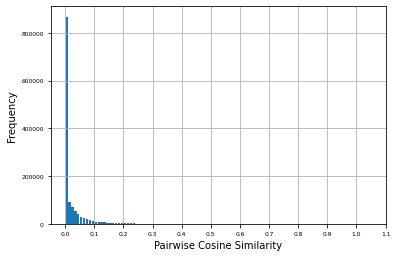

Euclidean Distance Mean: 1.3968001301261443
Euclidean Distance Median: 1.414213562373095
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.0
Euclidean Distance Max: 1.4142135623730954


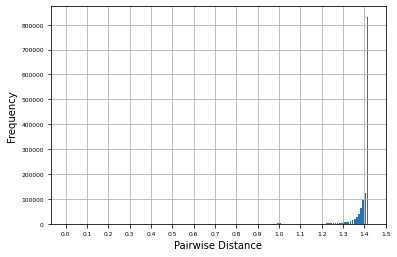

In [9]:
para_vectors = para_vectors.toarray().tolist()

para_pairs = [[a, b] for idx, a in enumerate(para_vectors) for b in para_vectors[idx + 1:]]

para_sim_list, para_count, para_dist_list = calculate_pairwise_metrics(para_pairs)
print_similarity_statistics(para_sim_list)
print('\nNumber of Pairs:', len(para_pairs))
print('Number of Orthogonal Pairs:', para_count)
plot_similarities(para_sim_list)

print_distance_statistics(para_dist_list)
plot_distances(para_dist_list)

Cosine Similarity Mean: 0.019603841279011342
Cosine Similarity Median: 0.0
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 1.0000000000000002

Number of Pairs: 598965
Number of Orthogonal Pairs: 437676
Percentage of Orthogonal Pairs: 0.7307204928501665


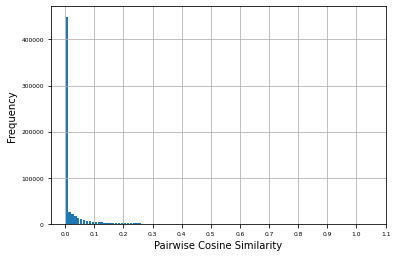

Euclidean Distance Mean: 1.3995396937044458
Euclidean Distance Median: 1.414213562373095
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.0
Euclidean Distance Max: 1.4142135623730954


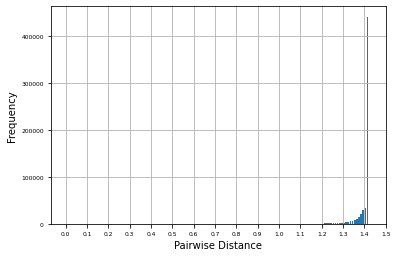

In [10]:
assess_vectors = assess_vectors.toarray().tolist()

assess_pairs = [[a, b] for idx, a in enumerate(assess_vectors) for b in assess_vectors[idx + 1:]]

assess_sim_list, assess_count, assess_dist_list = calculate_pairwise_metrics(assess_pairs)
print_similarity_statistics(assess_sim_list)
print('\nNumber of Pairs:', len(assess_pairs))
print('Number of Orthogonal Pairs:', assess_count)
print('Percentage of Orthogonal Pairs:', assess_count/len(assess_pairs))
plot_similarities(assess_sim_list)

print_distance_statistics(assess_dist_list)
plot_distances(assess_dist_list)

In [35]:
km = KMeans(n_clusters = 200, max_iter = 50000, init = 'k-means++')
cluster_assignment = km.fit(assess_vectors).labels_
s = silhouette_score(assess_vectors, cluster_assignment, metric='euclidean')
print(s)

0.10879960415421469


In [36]:
clusterIndex_to_clusteredText1 = defaultdict(lambda: " ")
text_id1_to_clusterIndex = dict()

for i, clusterIndex in enumerate(cluster_assignment): # len(cluster_assignment) is equal to len(vectors)
    clusterIndex_to_clusteredText1[clusterIndex] += orig_assess[i] + ". " 
    text_id1_to_clusterIndex[assess_ids[i]] = clusterIndex

Cosine Similarity Mean: 0.017778784302364445
Cosine Similarity Median: 0.0
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 0.8496707999000419

Number of Pairs: 595644
Number of Orthogonal Pairs: 437561
Percentage of Orthogonal Pairs: 0.7346015405174903


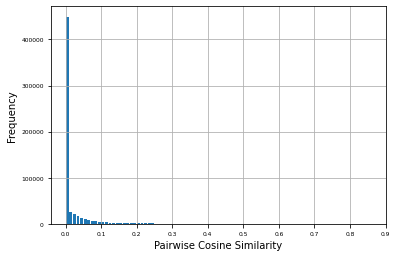

Euclidean Distance Mean: 1.4011054754007257
Euclidean Distance Median: 1.4142135623730951
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.5483232625011603
Euclidean Distance Max: 1.4142135623730954


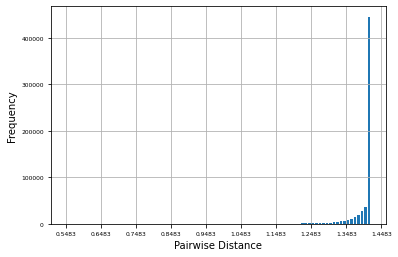

In [37]:
assess_pair_ids = [[a, b] for idx, a in enumerate(assess_ids) for b in assess_ids[idx + 1:]]

inter_cluster_pairs = []
for index in range(0,len(assess_pairs)):
    a, b = assess_pairs[index]
    a_id, b_id = assess_pair_ids[index]
    a_cluster = text_id1_to_clusterIndex[a_id]
    b_cluster = text_id1_to_clusterIndex[b_id]
    if a_cluster != b_cluster:
        inter_cluster_pairs.append([a,b])
    
cluster_sim_list, cluster_count, cluster_dist_list = calculate_pairwise_metrics(inter_cluster_pairs)
print_similarity_statistics(cluster_sim_list)
print('\nNumber of Pairs:', len(inter_cluster_pairs))
print('Number of Orthogonal Pairs:', cluster_count)
print('Percentage of Orthogonal Pairs:', cluster_count/len(inter_cluster_pairs))
plot_similarities(cluster_sim_list)

print_distance_statistics(cluster_dist_list)
plot_distances(cluster_dist_list)

Cosine Similarity Mean: 0.34694025735786255
Cosine Similarity Median: 0.31144923380133227
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 1.0000000000000002

Number of Pairs: 3321
Number of Orthogonal Pairs: 115
Percentage of Orthogonal Pairs: 0.03462812405901837


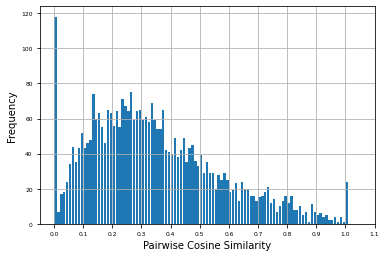

Euclidean Distance Mean: 1.1187060674776952
Euclidean Distance Median: 1.173499694246801
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.0
Euclidean Distance Max: 1.4142135623730954


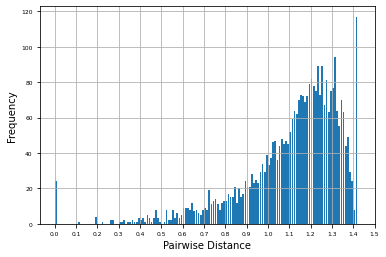

In [38]:
assess_pair_ids = [[a, b] for idx, a in enumerate(assess_ids) for b in assess_ids[idx + 1:]]

intra_cluster_pairs = []
for index in range(0,len(assess_pairs)):
    a, b = assess_pairs[index]
    a_id, b_id = assess_pair_ids[index]
    a_cluster = text_id1_to_clusterIndex[a_id]
    b_cluster = text_id1_to_clusterIndex[b_id]
    if a_cluster == b_cluster:
        intra_cluster_pairs.append([a,b])
    
cluster_sim_list, cluster_count, cluster_dist_list = calculate_pairwise_metrics(intra_cluster_pairs)
print_similarity_statistics(cluster_sim_list)
print('\nNumber of Pairs:', len(intra_cluster_pairs))
print('Number of Orthogonal Pairs:', cluster_count)
print('Percentage of Orthogonal Pairs:', cluster_count/len(intra_cluster_pairs))
plot_similarities(cluster_sim_list)

print_distance_statistics(cluster_dist_list)
plot_distances(cluster_dist_list)

In [39]:
Counter(cluster_assignment)

Counter({33: 7,
         150: 3,
         96: 2,
         179: 5,
         198: 3,
         72: 5,
         87: 5,
         166: 3,
         195: 8,
         125: 5,
         135: 4,
         73: 7,
         74: 8,
         130: 12,
         156: 3,
         5: 7,
         55: 15,
         27: 3,
         50: 9,
         60: 3,
         165: 5,
         143: 4,
         160: 8,
         128: 6,
         155: 4,
         32: 9,
         39: 7,
         188: 6,
         164: 6,
         102: 7,
         28: 2,
         100: 2,
         104: 8,
         148: 4,
         13: 4,
         71: 5,
         167: 5,
         109: 9,
         16: 4,
         19: 10,
         118: 3,
         58: 8,
         94: 11,
         127: 12,
         111: 2,
         147: 4,
         197: 5,
         51: 9,
         31: 8,
         38: 8,
         174: 9,
         138: 4,
         43: 7,
         146: 7,
         1: 3,
         199: 4,
         117: 5,
         59: 13,
         53: 12,
         12: 12,
  

In [17]:
k = 2
k_list = []
best_k = 75

score_list = []
best_score = -2.0

while k <= 500:
    km = KMeans(n_clusters = k, max_iter = 50000, init = 'k-means++', random_state=43)
    cluster_assignment = km.fit(assess_vectors).labels_
    s = silhouette_score(assess_vectors, cluster_assignment, metric='euclidean')
    if s > best_score:
        best_score = s
        best_k = k
    k_list.append(k)
    score_list.append(s)
    k += 1

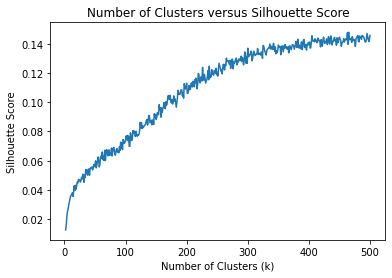

In [18]:
plt.plot(k_list,score_list)
plt.title('Number of Clusters versus Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [19]:
print('Best value for k:', best_k)
print('Best Silhouette Score:', best_score)

Best value for k: 465
Best Silhouette Score: 0.14785032556454653


In [57]:
runs = 0
assignment_list = []
while runs < 10:
    km = KMeans(n_clusters = 200, max_iter = 50000, init = 'k-means++')
    cluster_assignment = km.fit(assess_vectors).labels_
    runs  += 1
    assignment_list.append(cluster_assignment)

clustering_pairs = [[a, b] for idx, a in enumerate(assignment_list) for b in assignment_list[idx + 1:]]

pair_numbers = []
for number in range(0,10):
    for another_number in range(0,10):
        if another_number > number: 
            pair_numbers.append([number+1, another_number+1])

from sklearn.metrics.cluster import adjusted_mutual_info_score

ami_score_list = []
for index in range(0, len(clustering_pairs)):
    label = 'Comparing Run ' + str(pair_numbers[index][0]) + ' and Run ' + str(pair_numbers[index][1])
    ami_score = adjusted_mutual_info_score(clustering_pairs[index][0], clustering_pairs[index][1])
    ami_score_list.append([label, ami_score])
    
import csv

with open("../../../OneDrive/SMART/Jesse_2021/StoryBoards/SMART_cluster_assignment_OLI Biology_tfidf.csv","w+") as my_csv:
    newarray = csv.writer(my_csv,delimiter=',')
    newarray.writerows(assignment_list)
    newarray.writerows(ami_score_list)

In [58]:
print(assess_vectors[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3936920858400107, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1266920436541383, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.11967714211919121, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [60]:
from scipy.sparse import csr_matrix

a = csr_matrix(assess_vectors)

a[0]

<1x2630 sparse matrix of type '<class 'numpy.float64'>'
	with 38 stored elements in Compressed Sparse Row format>

In [61]:
a[0].indices

array([   9,   21,   78,  206,  244,  258,  340,  368,  369,  386,  483,
        495,  653,  706,  780,  862,  891,  997, 1071, 1140, 1310, 1337,
       1379, 1400, 1480, 1537, 1604, 1660, 1672, 2033, 2171, 2190, 2305,
       2394, 2409, 2464, 2558, 2573], dtype=int32)

In [127]:
feature_to_item_dict = {}
for feature in range(0, len(assess_vectors[0])):
    feature_to_item_dict['Feature ' + str(feature)] = 0
for item_index in range(0, a.shape[0]):
    vector = a[item_index]
    indices = vector.indices
    for feature_index in indices:
        feature_to_item_dict['Feature ' + str(feature_index)] += 1
count = 0
threshold = int(len(assess_vectors) * 0.025)
print('Threshold:', str(threshold))
feature_list = []
for feature in range(0, len(assess_vectors[0])):
    if feature_to_item_dict['Feature ' + str(feature)] >= threshold:
        count += 1
        feature_list.append(feature)
print('Number of features present in more than the threshold number of assessment items: ', str(count))

Threshold: 27
Number of features present in more than the threshold number of assessment items:  112


In [132]:
new_assess_vectors = vectorizer.fit_transform(orig_assess)

Cosine Similarity Mean: 0.01697415374681766
Cosine Similarity Median: 0.00207989320373701
Cosine Similarity Mode: 0.0
Cosine Similarity Min: 0.0
Cosine Similarity Max: 1.0000000000000002

Number of Pairs: 598965
Number of Orthogonal Pairs: 81101
Percentage of Orthogonal Pairs: 0.13540190161361682


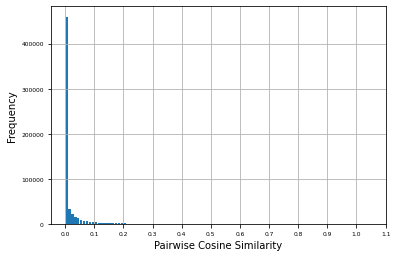

Euclidean Distance Mean: 1.4016357514474942
Euclidean Distance Median: 1.4127420902601175
Euclidean Distance Mode: 1.4142135623730951
Euclidean Distance Min: 0.0
Euclidean Distance Max: 1.4142135623730954


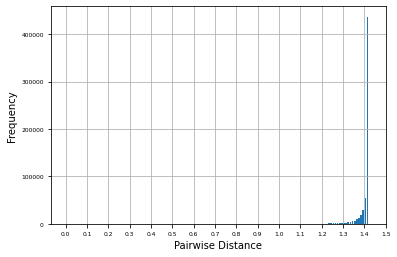

In [134]:
new_assess_vectors = new_assess_vectors.toarray().tolist()

new_assess_pairs = [[a, b] for idx, a in enumerate(new_assess_vectors) for b in new_assess_vectors[idx + 1:]]

new_assess_sim_list, new_assess_count, new_assess_dist_list = calculate_pairwise_metrics(new_assess_pairs)
print_similarity_statistics(new_assess_sim_list)
print('\nNumber of Pairs:', len(new_assess_pairs))
print('Number of Orthogonal Pairs:', new_assess_count)
print('Percentage of Orthogonal Pairs:', new_assess_count/len(new_assess_pairs))
plot_similarities(new_assess_sim_list)

print_distance_statistics(new_assess_dist_list)
plot_distances(new_assess_dist_list)

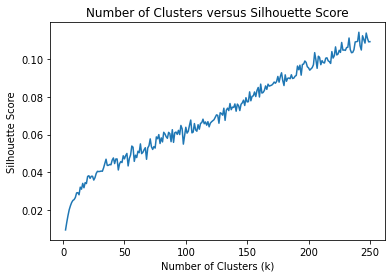

Best value for k: 241
Best Silhouette Score: 0.1141216882503591


In [135]:
k = 2
k_list = []
best_k = 2

score_list = []
best_score = -2.0

while k <= 250:
    km = KMeans(n_clusters = k, max_iter = 50000, init = 'k-means++', random_state=43)
    cluster_assignment = km.fit(new_assess_vectors).labels_
    s = silhouette_score(new_assess_vectors, cluster_assignment, metric='euclidean')
    if s > best_score:
        best_score = s
        best_k = k
    k_list.append(k)
    score_list.append(s)
    k += 1
    
plt.plot(k_list,score_list)
plt.title('Number of Clusters versus Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

print('Best value for k:', best_k)
print('Best Silhouette Score:', best_score)

In [136]:
def condition(x):
   return(x!=0.0)

count_list = []
for vector in new_assess_vectors:
    count_list.append(sum(condition(x) for x in vector))

print('The minimum number of non-zero entries is: ', min(count_list))
print('The maximum number of non-zero entries is: ', max(count_list))
print('The mean number of non-zero entries is: ', mean(count_list))

The minimum number of non-zero entries is:  2
The maximum number of non-zero entries is:  85
The mean number of non-zero entries is:  16.84931506849315
